
# Minimising Churn Rate by analysing Financial Habits

__Churn Rate__: It is the cancellation of subscirption for a product.

__The Company__:

A fintech company that provides product to its users, which allows them to manage their bank accounts and provides them with personalised coupons, informs them of the latest APR loans available in the market and educates them on saving money.


__Market__

The target audience is the entirety of company's subscription base. 

__Product__

The subscirption products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.

__Goal__: 

Build a model to predict which users are likely to churn so that the company can focus on re-engaging these users with their product. A solution could be to introduce email reminders about the benefits of the product and focusing on pushing out notifications on new features or features that users have been most engaged on.

## Importing Dataset and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('churn_data.csv')

## EDA

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.shape

(27000, 31)

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

### Data Cleaning

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

__We can see that rewards_earned and credit_score have a lot of missing values therefore we will remove the columns.__

In [8]:
#Removing 4 rows in age which are missing
dataset = dataset[pd.notnull(dataset['age'])]

In [9]:
#Check
dataset.isna().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score               8027
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3223
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
#Removing the Credit_score and Rewards_earned columns
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [11]:
#Check
dataset.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

### Visualisation

### Histogram

In [12]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

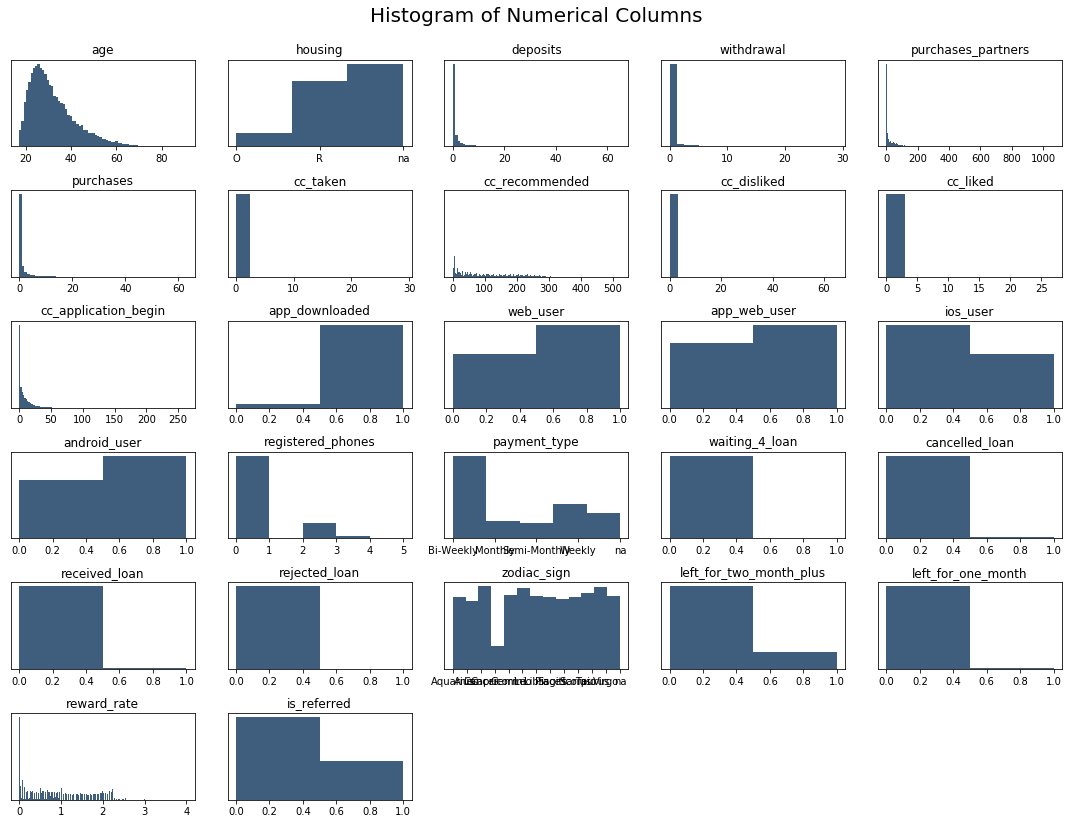

In [16]:
#Ensure seaborn version: 0.8.2 and matplotlib version: 2.1.2 for below to run
fig = plt.figure(figsize = (15, 12))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)

for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

We will focus on binary variables which we saw above and cannot be explored fully. We will utilise the pie-charts in order to further our investigation into them. We need to do this to ensure that the distribution for the binary variables is not in the extremes. 

### Pie Chart

In [17]:
dataset3 = dataset[['housing','is_referred','app_downloaded', 'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
                    'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

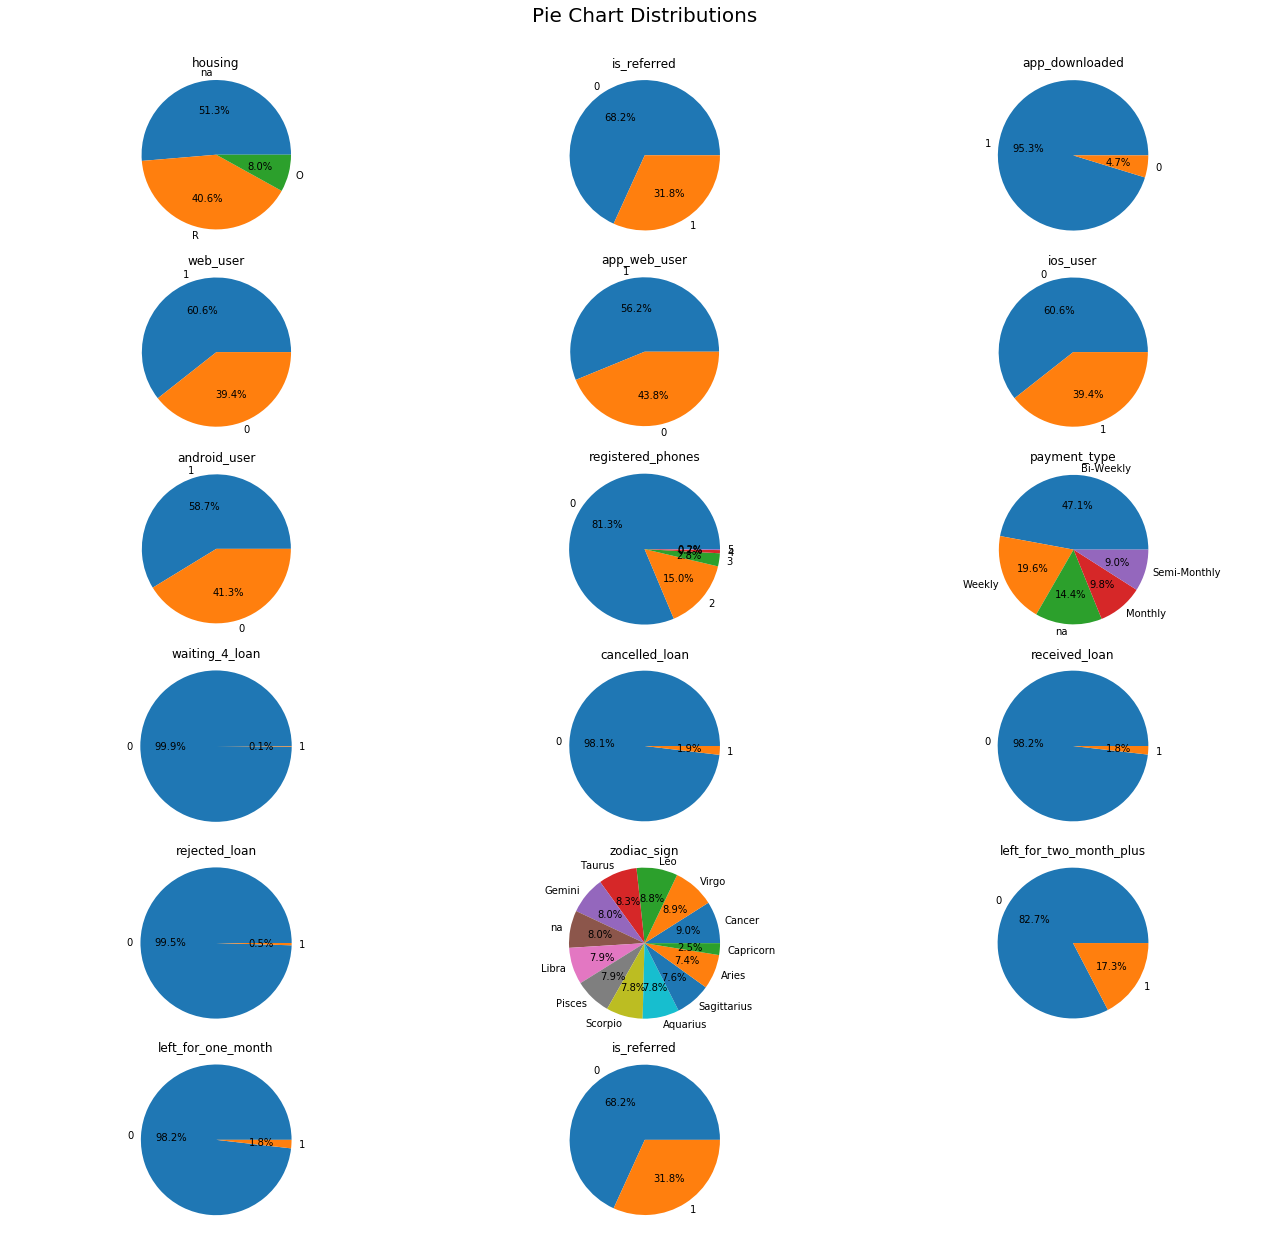

In [19]:
#Ensure seaborn version: 0.8.2 and matplotlib version: 2.1.2 for below to run
fig = plt.figure(figsize = (18, 18))
plt.suptitle('Pie Chart Distributions', fontsize = 20)

for i in range(1, dataset3.shape[1] + 1):
    plt.subplot(6, 3, i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset3.columns.values[i-1])
    values = dataset3.iloc[:,i-1].value_counts(normalize = True).values
    index = dataset3.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct = '%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

__Summary__:

We can see that most pie charts have even distributions with negligible deviation but nothing of too extreme to have a concern.

We can see however that, waiting_for_a_loan, cancelled_loan, received_loan, rejected_loan and left_for_one_month pie charts have small subsets that cause a concern. So we explore them below to check whether they are actually of any usefulness in our model.

In [20]:
dataset[dataset3.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [21]:
dataset[dataset3.received_loan == 1].churn.value_counts() #Balanced Distribution

1    292
0    199
Name: churn, dtype: int64

In [22]:
dataset[dataset3.rejected_loan == 1].churn.value_counts() #Balanced Distribution here too

1    107
0     25
Name: churn, dtype: int64

In [24]:
dataset[dataset3.left_for_one_month == 1].churn.value_counts() #Looks balanced

1    266
0    222
Name: churn, dtype: int64

### Correlation Plot

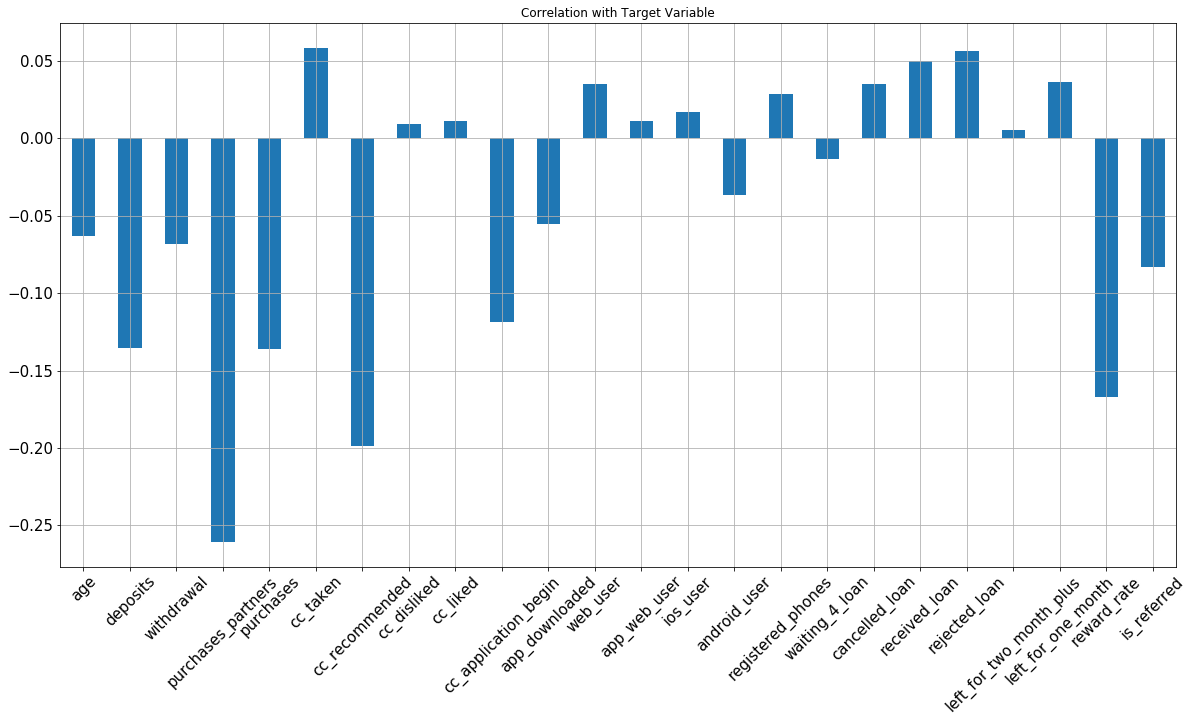

In [25]:
#Exploring the uneven features
num_only_data = dataset.drop(columns = ['churn', 'user', 'housing', 
                                        'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
figsize = (20, 10), title = 'Correlation with Target Variable', fontsize = 15,
rot = 45, grid = True)

#### Summary

__age__: It is negatively correlated with the churn target variable. This means that the younger users are more likely to churn.

__deposits, withdraw and partner purchases__: They are all negatively correlated with the target. This means that the smaller the depost, the more likely user is likely to churn. Similar reasoing can be applied to the smaller the size of withdrawals and purchases. This is because the less activity the user will have, the more likely they will cancel the subscription because they do not use the product too much. 

__cc_taken (credit card)__: This is interesting as it means that if the user has taken a credit card from the company, the likely they are to churn as they are likely to be unhappy. The reason behind this could be possibly higher APR rates. 

__cc_recommended__: The less recommendations users have for the credit card product, the more likely they are to churn.

__cc_application_begin__: Makes sense that the more applications the user makes, the less likely they are to churn.

__app_downloaded__: Again makes sense that if users have downloaded the app, the less likely they are to churn.

__is_referred__: If the user is recommended by someone, they are less likely to churn

The rest of the bars have negligible correlation (~5% of the users) so we do not need to worry too much about them. 

### Correlation Matrix

In [26]:
sns.set(style='white')

In [27]:
#Computing the correlation Matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

In [28]:
#Generating a mask for the upper triangle due to the symmetry of the matrix
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

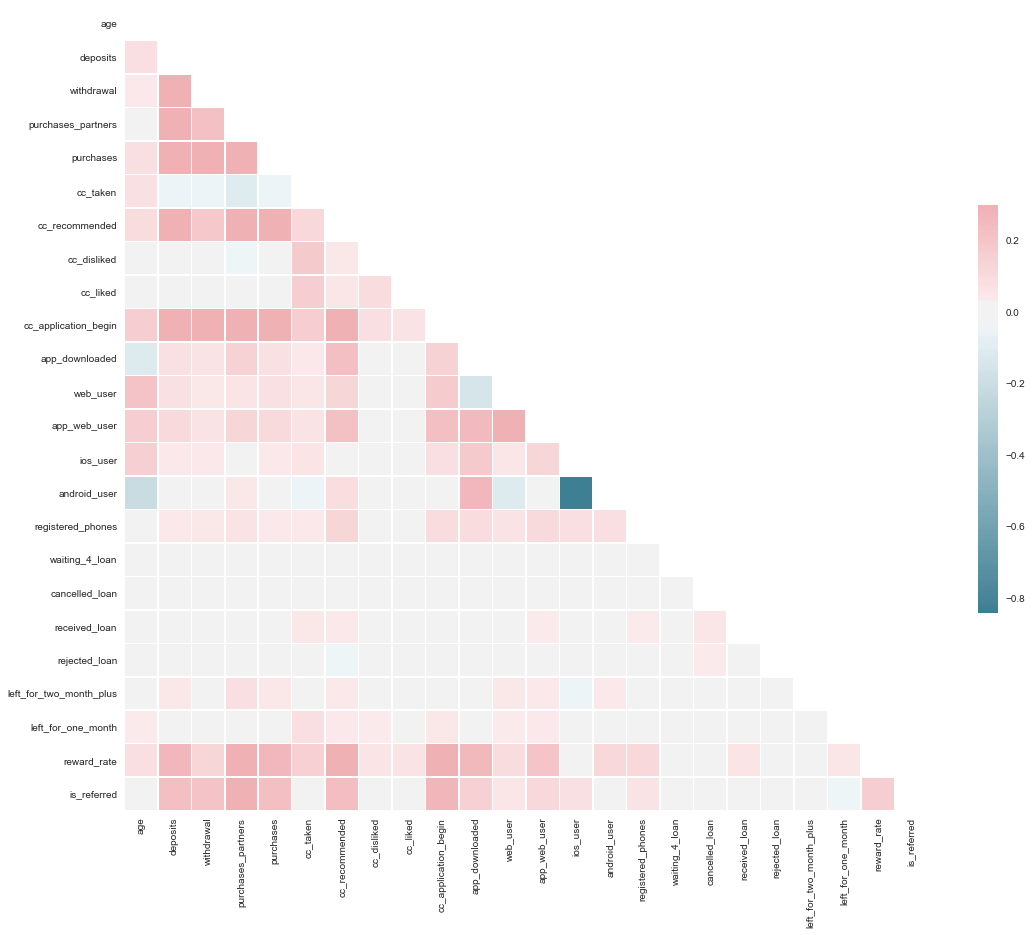

In [33]:
#Setting the matplotlib figure
fig, axes = plt.subplots(figsize = (18, 15))

#Generate a custome diverging colourmap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3,
           center = 0, square = True, linewidths = 0.5,
           cbar_kws = {"shrink": 0.5})

#### Summary

We can see that majority of the variables have negligible correlation with each other therefore there is no such concern of them having an impact to our target variable. 

We can also see that ios and android users are strong negatively correlated variables which makes sense because you can either be android or ios with only certain users either having both or none of the two os. 

Another unoticeable correlation is the app_web_user with app_downloaded and web_user. The variable app_web_user is depended on the two as app_web_user is the function of app_downloaded and web_user. This means that if both are 1's then app_web_user has a value of 1. So the best solution is to remove the app_web_user column. 

In [34]:
dataset = dataset.drop(columns = ['app_web_user'])

In [35]:
dataset.to_csv('newchurndata.csv', index = False)